# MODEL CREATION - Decision Tree
# No Formula, Model is created tree like structure

Step 01 - Data collection
Step 02 - Data Preprocessing
Step 03 - Input/Output Split
Step 04 - Split train and test dataset
Step 05 - Model Creation using training set
Step 06 - Model Evaluation using Test set
Step 07 - Save the best model

Step 01 and 02 are already done and Dataset '50_Startups.csv' stored in the path

In [1]:
#Step 03 - Input/Output Split
#importing pandas library for handling the tables (.csv)
import pandas as pd

In [2]:
#Step 03 - Input/Output Split
#Reading the data from csv file and storing the values in the variable 'dataset'
dataset=pd.read_csv("50_Startups.csv")

In [3]:
#Step 03 - Input/Output Split
#Since the dataset has catorical columns, One hot encoding has to be done before processing. 
#One hot encoding is done for uncomparable catagorical values
dataset=pd.get_dummies(dataset,drop_first=True)

In [4]:
#Step 03 - Input/Output Split
#To view the colum names in the dataset
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [5]:
#Step 03 - Input/Output Split
#Spliting and Assigning all the input columns to a variable
independent=dataset[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']]

In [6]:
#Step 03 - Input/Output Split
#Spliting and Assigning the output column to a variable
dependent=dataset[['Profit']]

In [7]:
#Step 04 - Split train and test dataset
#sklearn is the machine Learning library. For processing the train and test datasets respective module imported
#This code spilts the entire dataset into 2 differnt dataset 01. Training set for training the model, 
#02. Test set for eveluating the created model. The test set is small (30%) with outputs so the accuracy can be calculated later


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent, dependent,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [8]:
x_train.shape

(35, 5)

In [9]:
x_test.shape

(15, 5)

In [10]:
y_train.shape

(35, 1)

In [11]:
y_test.shape

(15, 1)

In [184]:
#Step 05 - Model Creation using training set
#'fit' instruction plays the importent role as it creats the brain.
#Check the Hyper Tunning Parameters from the document and adjust it to find the best model

from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='absolute_error', splitter='best', max_features=None)
regressor.fit(x_train,y_train)


DecisionTreeRegressor(criterion='absolute_error')

<function matplotlib.pyplot.show(close=None, block=None)>

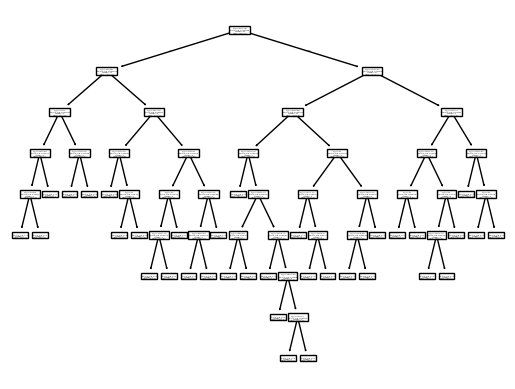

In [185]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show

In [186]:
#Step 06 - Model Eveluation using Test set
#Predicting the value. Provide the input and model will generate the predicted output
y_predict=regressor.predict(x_test)

In [187]:
y_predict

array([101004.64, 141585.52, 141585.52,  90708.19, 182901.99, 108733.99,
        69758.98,  99937.59, 108733.99, 155752.6 ,  89949.14,  89949.14,
       108552.04,  89949.14, 141585.52])

In [188]:
y_predict.shape

(15,)

In [189]:
#Step 06 - Model Evaluation using Test set
#Importing the 'metrics' for 'r2_score' function

from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_predict)

In [190]:
#Step 06 - Model Evaluation using Test set
#Result close to 1 is best Model; Result close to 0 is bad model
r_score

0.9328764073589589

In [191]:
#Step 07 - Save the best model
#pickle library used for saving the model. Create the file with a name

import pickle
FileName="finalized_model_DecisionTree.sav"

In [192]:
#Step 07 - Save the best model
#Sending the model to the created file. 'wb' - Write Binary

pickle.dump(regressor,open(FileName,'wb'))

In [193]:
Res=regressor.predict([[3342,45324,4453,1,0]])

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [194]:
Res

array([49490.75])